In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

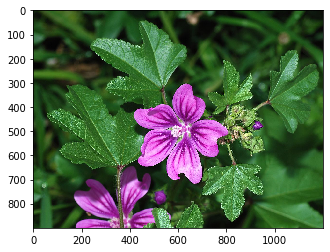

In [3]:
img = pil_image = Image.open('../plantnetSimplon/test_malva.jpg')
plt.imshow(img)

New size: 150 x 150


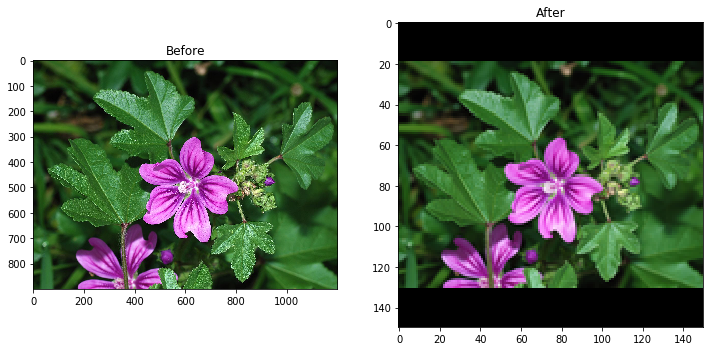

In [4]:
def resize_image(src_image, size=(200,200), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    src_image.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square background image
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the resized image into the center of the square background
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
  
    # return the resized image
    return new_image


# # Get the image size
# o_h, o_w = img.size
# print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 x 150 with black padding
target_size = (150,150)
pad_color = "black"
resized_img = resize_image(img.copy(), target_size, pad_color)
n_h, n_w = resized_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(resized_img)
a.set_title('After')

plt.show()


In [5]:
def remove_background(image_rgb, start_x=0, start_y=0, width=150, height=150):
    # Convert to RGB
#     image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Rectangle values: start x, start y, width, height
    rectangle = (start_x, start_y, width, height)
    # Create initial mask
    mask = np.zeros(image_rgb.shape[:2], np.uint8)

    # Create temporary arrays used by grabCut
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Run grabCut
    cv2.grabCut(image_rgb, # Our image
                mask, # The Mask
                rectangle, # Our rectangle
                bgdModel, # Temporary array for background
                fgdModel, # Temporary array for background
                5, # Number of iterations
                cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

    # Create mask where sure and likely backgrounds set to 0, otherwise 1
    mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

    # Multiply image with new mask to subtract background
    image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
    return image_rgb_nobg

In [6]:
resized_img_arr = np.array(resized_img)

In [7]:
image_rgb_nobg = remove_background(resized_img_arr, 23, 23, 110, 125)

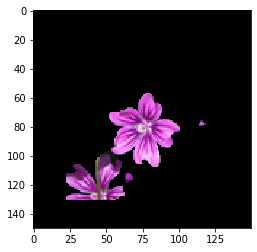

In [8]:
plt.imshow(image_rgb_nobg)

In [9]:
image_rgb_nobg.shape

(150, 150, 3)

In [10]:
X_test = image_rgb_nobg.ravel()

In [11]:
X_test_r = X_test.reshape(1, -1)

In [12]:
X_test_r.shape

(1, 67500)

In [14]:
clf = joblib.load('pipeline_model.joblib')

In [15]:
y_pred = clf.predict(X_test_r)

In [16]:
y_pred

array([2.])

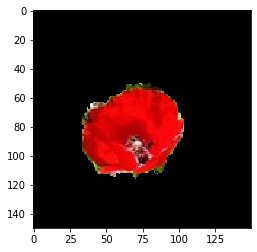

In [23]:
test = pil_image = Image.open('../plantnetSimplon/training_data_/training/Papaver_rhoeas_L/img_100.jpg')
plt.imshow(test)

In [24]:
X_test2 = np.array(test).ravel().reshape(1, -1)

In [25]:
X_test2.shape

(1, 67500)

In [26]:
y_pred2 = clf.predict(X_test2)

In [27]:
y_pred2

array([3.])

In [46]:
def reduce_features(X, n):
    pca = PCA(n_components=n, svd_solver='randomized', whiten=True)
    scaler = StandardScaler().fit(X)
    Z = scaler.transform(X)
    pca.fit(Z)
    return pca.transform(Z)

In [48]:
if X_test_r.shape[1] >=150:
    X = reduce_features(X_test_r, 150)
else:
    X = np.sort(X_test_r)[:,::-1][:,:150] 

ValueError: n_components=150 must be between 1 and min(n_samples, n_features)=1 with svd_solver='randomized'

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252,
        252, 252, 252, 252, 252, 252, 252]], dtype=uint8)

In [59]:
i = np.identity(50000)

MemoryError: Unable to allocate 18.6 GiB for an array with shape (50000, 50000) and data type float64